In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


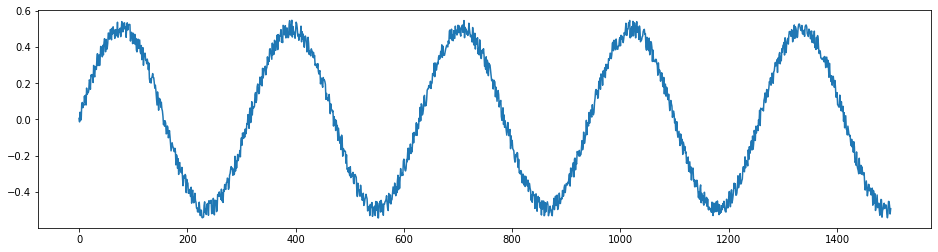

In [2]:
N=1500
t=np.arange(0,N)
data_sine=np.sin(0.02*t)/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine)
plt.show()


In [3]:
from re import S
def convertsignaltodataset(signal,step):
  X=[]
  Y=[]
  for i in range(len(signal)-step):
    j=i+step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X),np.array(Y)


In [4]:
X_sine,Y_sine=convertsignaltodataset(data_sine,40)
#X_square,Y_square=convertsignaltodataset(data_square,40,label=1)
#X_tringle,Y_tringle=convertsignaltodataset(data_tringle,40,label=2)

In [5]:
X_sine.shape

(1460, 40)

In [6]:
X_train = np.array(X_sine[0:800])
Y_train = np.array(Y_sine[0:800])
X_test = np.array(X_sine[800:len(X_sine)])
Y_test = np.array(Y_sine[800:len(Y_sine)])

In [7]:
X_train=X_train[...,np.newaxis]
X_test=X_test[...,np.newaxis]

In [8]:
print(X_test.shape)

(660, 40, 1)


In [9]:
model=tf.keras.models.Sequential([layers.GRU(units=64,input_shape=(None,1))
,layers.Dense(1)])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MSE)

In [11]:
model.fit(X_train,Y_train,epochs=15,batch_size=16)

Epoch 1/15
50/50 [==============================] - 2s 14ms/step - loss: 0.0295
Epoch 2/15
50/50 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 3/15
50/50 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 4/15
50/50 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 5/15
50/50 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 6/15
50/50 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 7/15
50/50 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 8/15
50/50 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 9/15
50/50 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 10/15
50/50 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 11/15
50/50 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 12/15
50/50 [==============================] - 1s 25ms/step - loss: 0.0013
Epoch 13/15
50/50 [==================

In [12]:
model.evaluate(X_test,Y_test)

21/21 [==============================] - 1s 10ms/step - loss: 0.0012


0.001221963670104742

inference

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [14]:
len_test_pred = len(train_pred) + len(test_pred)
temp_test_pred = np.empty((len_test_pred,1))
temp_test_pred[0:len(train_pred)] = train_pred
temp_test_pred[len(train_pred):len_test_pred] = test_pred

No handles with labels found to put in legend.


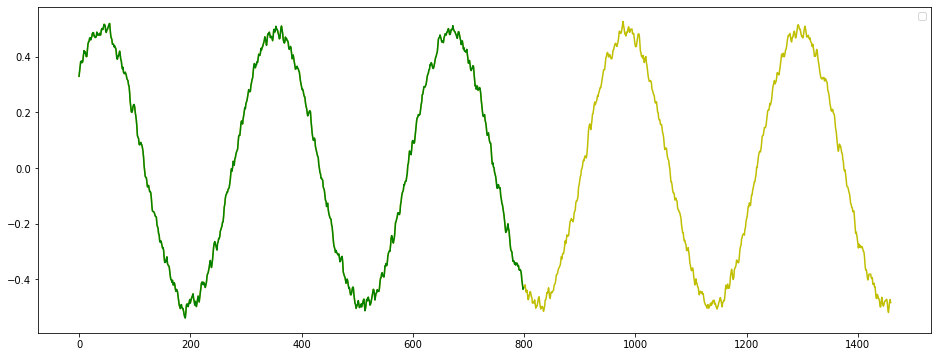

In [15]:
plt.figure(figsize=(16, 6))
plt.plot(temp_test_pred, color='y')
plt.plot(train_pred, color='g')
plt.legend()